In [ ]:
#House Price Prediction


import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#print(sys.argv)

data=pd.read_csv(r"./housepriceprediction/housing_California_Housing_Data.csv")#delimiter=",")


In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')
"""

"from google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
data.head()
data.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from sklearn.linear_model import LinearRegression



In [ ]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
#from sklearn.feature_selection import RFE

X=data.drop(["median_house_value"],axis=1)
Y=data["median_house_value"]

In [ ]:
print(X.shape);
X #,Y

(20433, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
stscaler = StandardScaler()

#print(X.shape)
#Xnew = X.drop(columns=['ocean_proximity']) #pd.get_dummies(data,columns=['ocean_proximity'])
#Xnew = scaler.fit_transform(X)
#print(Xnew.shape)

In [ ]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
ocean_proximity_<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


In [ ]:
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
#X_train.shape

(16346, 9)

In [ ]:
X_ = X.drop(['ocean_proximity'],axis=1)
Xnew = scaler.fit_transform(X_)
print(Xnew.shape)

(20433, 8)


In [ ]:
d_train=X.join(Y)
#this drops all columns of  ocean proximity and appends the household value

### Dataset: features and targets

Target is Median_house_value and there are 9 features with "ocean_proximity" having different class of string values. We plot a heatmap of the covariance matrix to determine the important features.

In [ ]:
d_train.sort_values(by=['median_house_value'], ascending=False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
8852,-118.42,34.08,48.0,2413.0,261.0,770.0,248.0,15.0001,<1H OCEAN,500001.0
10454,-117.66,33.48,22.0,809.0,180.0,334.0,157.0,2.3846,<1H OCEAN,500001.0
5487,-118.50,33.97,29.0,2737.0,808.0,1157.0,696.0,5.1280,<1H OCEAN,500001.0
16020,-122.47,37.73,50.0,1653.0,252.0,641.0,224.0,10.6605,NEAR OCEAN,500001.0
16019,-122.47,37.73,52.0,2151.0,280.0,762.0,274.0,10.7309,NEAR OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
5887,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,<1H OCEAN,17500.0
9188,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,INLAND,14999.0
2799,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,INLAND,14999.0
19802,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,INLAND,14999.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

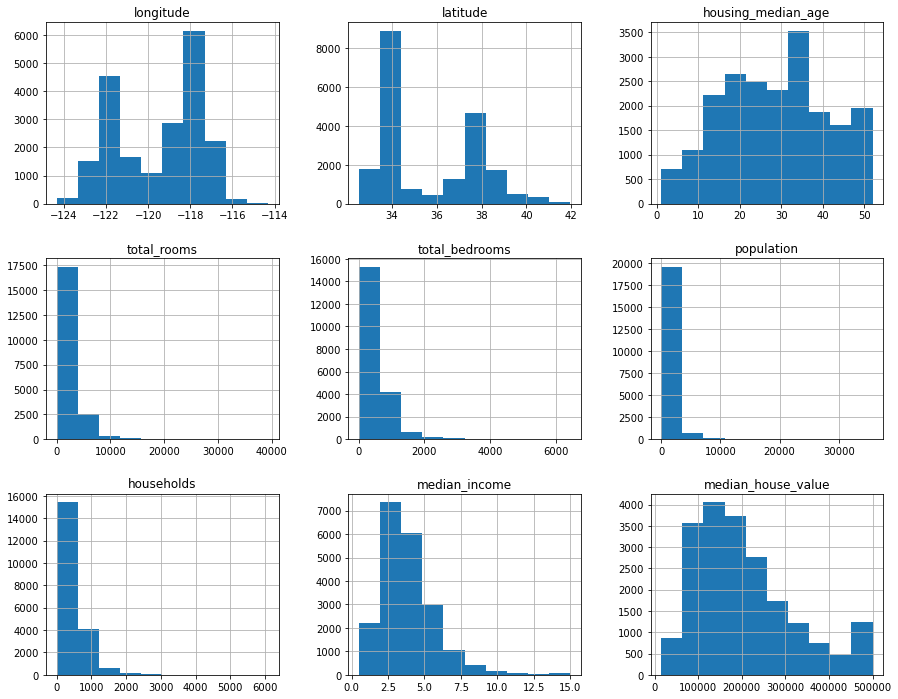

In [ ]:
d_train.hist(figsize=(15,12))

In [ ]:
d_train.corr()
d_train.shape

(20433, 16)

<AxesSubplot:>

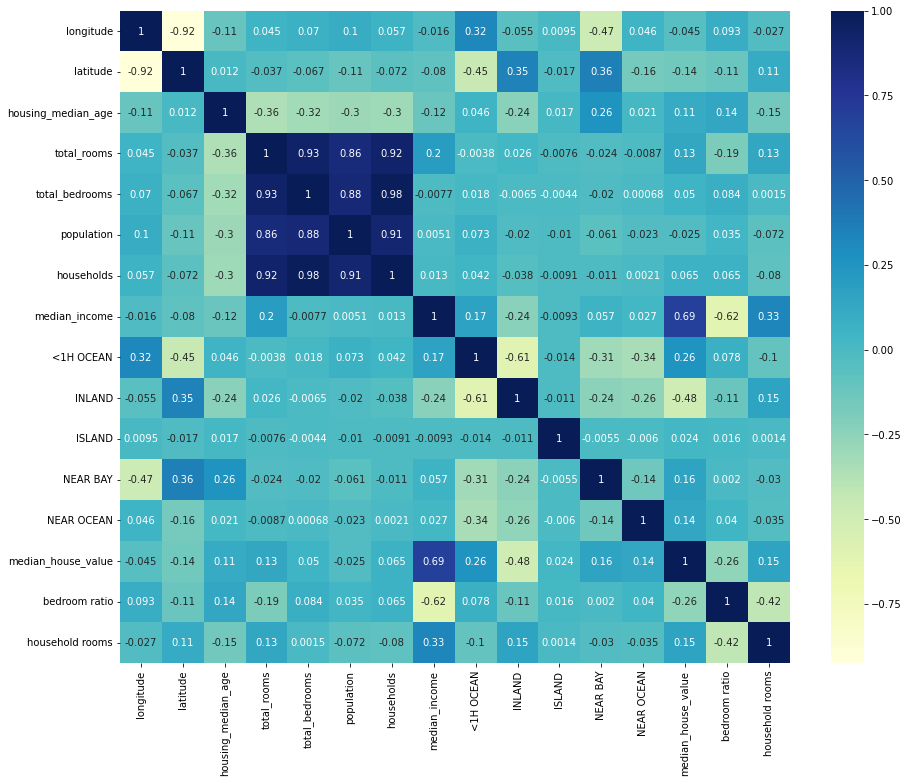

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(d_train.corr(),annot=True,cmap="YlGnBu")
#Seeing The Heat Map It Can Be Noted That, The Price Of the House Is Very Much Correlated With The Area and The Number Of Bathroom"
#The Price Of The House IS Correlated With The Following In The Decreasing Order->Area->Number Of Bathrooms->Number Of Parking->Number Of Stories->Number Of Bedrooms

In [ ]:
"""
d_train["total_rooms"]=np.log(d_train["total_rooms"]+1)
d_train["total_bedrooms"]=np.log(d_train["total_bedrooms"]+1)
d_train["population"]=np.log(d_train["population"]+1)
d_train["households"]=np.log(d_train["households"]+1)
#d_train["bedrooms"]=np.log(d_train["bedrooms"]+1)
"""

In [ ]:
#d_train["ocean_proximity"].value_counts()
#Returns a Series containing counts of unique rows in the DataFrame.
#We sssign feature Of {0,1} for each condition like semifurninished, unfurnished and furnished.
#Basically a one-hot representation

In [ ]:
#pd.get_dummies(d_train["ocean_proximity"])
#Converts categorical variable into dummy/indicator variables.


In [ ]:
#Already done, need not be repeated again if d_train.shape == (20433, 14/16)
#d_train=d_train.join(pd.get_dummies(d_train.ocean_proximity)).drop(["ocean_proximity","median_house_value"],axis=1).join(data["median_house_value"])
#d_train
print(d_train.shape)

(20433, 16)


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

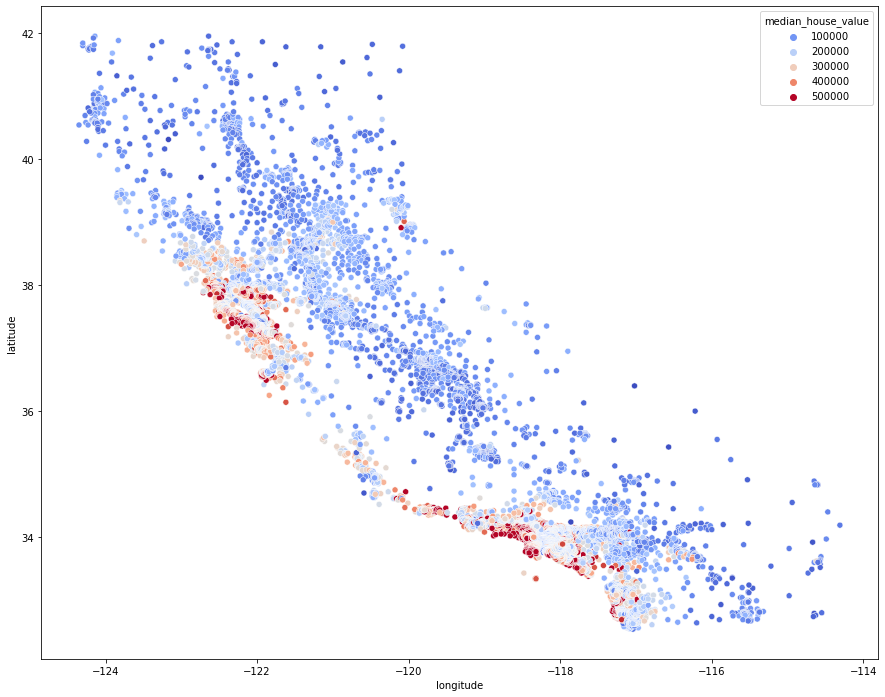

In [ ]:
plt.figure(figsize=(15,12))
sns.scatterplot(x="longitude",y="latitude",data=d_train,hue="median_house_value",palette="coolwarm")

In [ ]:
d_train["bedroom ratio"]=d_train["total_bedrooms"]/d_train["total_rooms"]
d_train["household rooms"]=d_train["total_rooms"]/d_train["households"]
d_train
d_train.drop(["median_house_value"],axis=1).join(data["median_house_value"])


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom ratio,household rooms,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,0.146591,6.984127,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,0.155797,6.238137,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,0.129516,8.288136,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,0.184458,5.817352,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,0.172096,6.281853,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0,0.224625,5.045455,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0,0.215208,6.114035,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0,0.215173,5.205543,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0,0.219892,5.329513,84700.0


<AxesSubplot:>

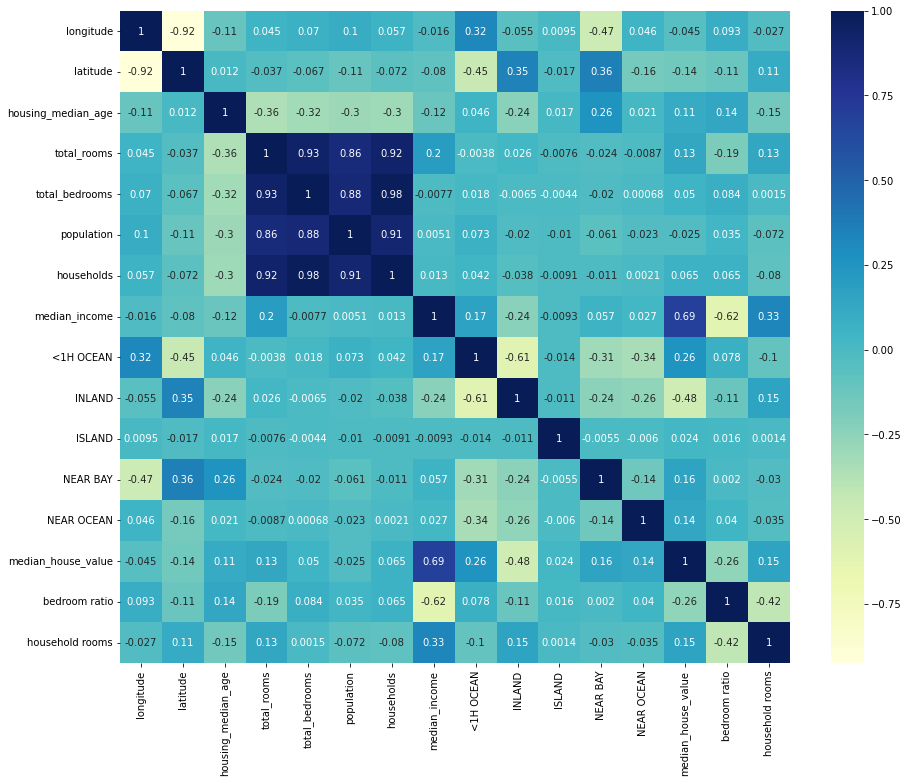

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(d_train.corr(),annot=True,cmap="YlGnBu")

## Gradient Descent Algorithm

Having looked at the confusion/covariance matrix, we find the following features to be most important in predicting the Household value:
* Median_income
* < 1 hr Proximity to the ocean
* Total number of rooms

whereas following features have a noticeable negative correlation to the Household value:
* being Inland, i.e. far away from the ocean
* bedroom to total house-area ratio

We start with the vanilla gradient descent algorithm and check the prediction efficiency of the linear regression estimator w.r.t. the dominant features.

### Gradients of a Mean-square Linear regression estimator

$$ J = \frac{1}{2m} (\hat{y} - w \cdot X^T - b)^2 $$
$$ \partial J/\partial w = -\frac{1}{2m} X^T (\hat{y} - w \cdot X^T - b)$$
$$ \partial J/\partial b = -\frac{1}{2m} (\hat{y} - w \cdot X^T - b)$$

In [ ]:
feature = d_train.drop(['median_house_value'], axis=1)
label = d_train.median_house_value
print(feature.shape)
print(label.shape)

(20433, 15)
(20433,)


In [ ]:
featureT = stscaler.fit_transform(feature.values)
labelT = stscaler.fit_transform(d_train.median_house_value.values.reshape(-1,1)).flatten()

In [ ]:
print(featureT.shape)
featureT

(20433, 15)


array([[-1.32731375,  1.05171726,  0.98216331, ..., -0.38418614,
        -1.1460242 ,  0.62539465],
       [-1.32232256,  1.04235526, -0.60621017, ..., -0.38418614,
        -0.98725423,  0.3249418 ],
       [-1.33230494,  1.03767426,  1.85576873, ..., -0.38418614,
        -1.44051403,  1.15059359],
       ...,
       [-0.82320322,  1.77727236, -0.92388486, ..., -0.38418614,
         0.03680837, -0.09094308],
       [-0.87311515,  1.77727236, -0.84446619, ..., -0.38418614,
         0.11820445, -0.04101319],
       [-0.83318561,  1.74918635, -1.00330353, ..., -0.38418614,
         0.14049521, -0.07113779]])

In [ ]:
print(labelT.shape)
labelT

(20433,)


array([ 2.12881864,  1.31362603,  1.25818254, ..., -0.99247676,
       -1.05831591, -1.01759959])

In [ ]:
"""import numpy as np

# Generate some random data for demonstration purposes
n, d = d_train.shape   # Number of data points, # Number of features
X = featureT  # n data points with d features
y = labelT  # n data points with 1 output variable


# Initialize weights and biases
# here the initial values of the W- and b-column vectors will be fed
pickstate = np.random.randint(0,n)
w = featureT[pickstate]
b = labelT[pickstate]
print(pickstate)
print(w.shape)
print(b)
"""

16742
(15,)
1.4565662895766558


In [ ]:
#w = np.random.randn(d, 1)  # d weights for the d features
#b = np.random.randn()  # Bias

import numpy as np

# Generate some random data for demonstration purposes
n, d = d_train.shape   # Number of data points, # Number of features
X = featureT  # n data points with d features
y = labelT  # n data points with 1 output variable


# Initialize weights and biases
# here the initial values of the W- and b-column vectors will be fed
pickstate = np.random.randint(0,n)
w = featureT[pickstate]
b = labelT[pickstate]
print(pickstate)
print(w.shape)
print(b)

# Set hyperparameters


alpha = 0.1 # Learning rate
tolerance = 0.001

num_iterations = 1000  # Number of iterations
CEAS1 = np.zeros((3, num_iterations))
CEAS2 = np.zeros((3, num_iterations))



# Perform gradient descent
#def gradD(alpha,w,b):
cost_at_each_step = []

for i in range(num_iterations):
    # Compute predicted values
    y_hat = np.dot(X, w) + b

    # Compute error
    error = y_hat - y

    # Compute gradients
    dw = np.dot(X.T, error) / n
    db = np.sum(error) / n

    # Update weights and biases
    w -= alpha * dw
    b -= alpha * db

    # Compute cost for monitoring convergence
    cost = np.mean(error**2)

    cost_at_each_step.append(cost)
    #if i>=1 and (cost - cost_at_each_step[i-1] <= tolerance):
    #    print("Error tolerance touched in {} steps".format(i))
    #    break
    # Print cost every 100 iterations
    if i % 100 == 0:
        print("Iteration", i, "Cost:", cost)
    #return cost_at_each_step

# Make predictions on new data
X_new = np.random.randn(10, d-1)  # 10 new data points with d features
y_pred = np.dot(X_new, w) + b
print("Predictions:", y_pred)

"""
tol = 0.001
for ai,alph in enumerate(Alpha):
    CEAS1[ai] = gradD(alph,w,b)
"""
#print(cost_at_each_step)
zz = np.diff(cost_at_each_step)
print(np.where(np.abs(zz) <= tol))


2043
(15,)
-1.1492778872962588
Iteration 0 Cost: 21.865128584666028
Iteration 100 Cost: 0.35480733733950437
Iteration 200 Cost: 0.35069858047572083
Iteration 300 Cost: 0.3489775421912199
Iteration 400 Cost: 0.34803405419811134
Iteration 500 Cost: 0.3474924829636593
Iteration 600 Cost: 0.34717586617344415
Iteration 700 Cost: 0.3469882236883698
Iteration 800 Cost: 0.34687566349835214
Iteration 900 Cost: 0.3468073562301901
Predictions: [ 0.1481245  -0.40643878  0.1243052   1.19424163 -0.40931463  0.87817648
  1.64761804  0.23698214 -0.83467015 -1.66453107]
(array([ 34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       

In [ ]:
CEAS1[0] = cost_at_each_step

In [ ]:
CEAS1[1] = cost_at_each_step

In [ ]:
CEAS1[2] = cost_at_each_step

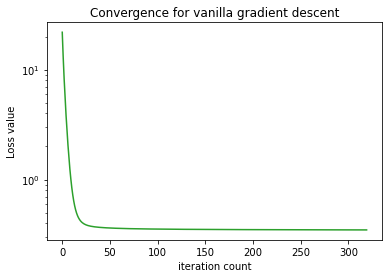

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
Alpha = np.array([0.01, 0.05, 0.1])

for k in range(3):
    plt.semilogy(np.arange(num_iterations)[:320], CEAS1[k,:320]) #, label =f'alpha = {Alpha[k]}')

#plt.legend()
plt.xlabel('iteration count')
plt.ylabel('Loss value')
plt.title('Convergence for vanilla gradient descent')
plt.show()

In [ ]:
#import numpy as np

def nesterov_accelerated_gradient_descent(X, y, learning_rate, momentum, num_iterations):
    # Initialize the weight vector
    w = np.zeros(X.shape[1])
    # Initialize the bias term
    b = 0
    # Initialize the velocity vector
    v = np.zeros(X.shape[1])
    # Initialize the cost history list
    cost_history = []
    # Loop through the specified number of iterations
    for i in range(num_iterations):
        # Update the velocity using the previous weight and momentum
        v = momentum * v - learning_rate * np.dot(X, w - momentum * v) / X.shape[0]
        # Update the weight using the velocity
        w += v
        # Make predictions using the current weight vector and bias term
        y_pred = np.dot(X, w) + b
        # Calculate the cost (mean squared error)
        cost = np.mean((y_pred - y) ** 2)
        # Append the cost to the cost history list
        cost_history.append(cost)
        # Print cost every 100 iterations
        if i % 100 == 0:
            print("Iteration", i, "Cost:", cost)
    return w, b, cost_history
nesterov_accelerated_gradient_descent(X, y, learning_rate, momentum, num_iterations)

In [ ]:
# W=np.zeros((np.shape(data_X1)[0],np.shape(data_X1)[1]))
# W
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=100):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        #print('shape of y=',np.shape(y))

        #initialize weights and bias to zeros
        self.weights=np.zeros((n_features,1))
        #print(np.shape(self.weights))

   #gradient descent

        for i in range(self.num_iterations):
          #computing predictions and errors
          y_pred=np.dot(X,self.weights)+self.bias
          error=y_pred-y

          #compute gradients

          delw=(1/n_samples)*np.dot(X.T,error)
          #print(np.shape(delw))
          delb=(1/n_samples)*np.sum(error)
         # print(np.shape(delb))

          #update weights and bias

          self.weights=self.weights-self.learning_rate*delw
          self.bias=self.bias-self.learning_rate*delb

    def predict(self,X):
      y_pred=np.dot(X,self.weights)+self.bias
      return y_pred

  #Creating The Linear Regression Object
lr=LinearRegression()

#generate some example data

# X=np.array([[1,2,3],[4,5,6],[7,8,9]])
# y=np.array([4.8,8.3,11.8])

#fit the model to the data

#X1 = d_train["median_income"]
#X2 = d_train["<1H OCEAN"]
#X1.head()


lr.fit(Xf1,Yt1)

#make a prediction on new data
y_pred=lr.predict(data_Xts1)
# X_new=np.array([[2,3,4],[5,6,7]])
# y_pred=lr.predict(X_new)

print(y_pred)
# print(X)



ValueError: not enough values to unpack (expected 2, got 1)

### Convergence analysis
To add a convergence criteria to the gradient descent algorithm, we can keep track of the difference between successive predictions in each iteration. We can stop the algorithm if this difference falls below the desired tolerance limit.

In [ ]:
from sklearn.linear_model import LinearRegression

X_train,Y_train=d_train.drop(["median_house_value"],axis=1),d_train["median_house_value"]
reg=LinearRegression()
reg.fit(X_train,Y_train)

In [ ]:
d_test=X_test.join(Y_test)
#d_test=d_test.drop(["bedroom_ratio","household_rooms"],axis=1)
d_test["bedroom ratio"]=d_test["total_bedrooms"]/d_test["total_rooms"]
d_test["household rooms"]=d_test["total_rooms"]/d_test["households"]
d_test

# temp_data=d_test.drop(["median_house_value","household rooms","bedroom ratio","ISLAND","NEAR OCEAN","NEAR BAY"],axis=1)
# temp_data
# temp_data=temp_data.join(d_test["ISLAND"])
# temp_data=temp_data.join(d_test["NEAR BAY"])
# temp_data=temp_data.join(d_test["NEAR OCEAN"])
# temp_data=temp_data.join(d_test["bedroom ratio"])
# temp_data=temp_data.join(d_test["household rooms"])
# temp_data=temp_data.join(d_test["median_house_value"])

# d_test=temp_data
d_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,bedroom ratio,household rooms
10797,-117.92,33.61,18.0,1538.0,425.0,425.0,288.0,5.3369,<1H OCEAN,312500.0,0.276333,5.340278
8610,-118.36,33.86,37.0,1768.0,314.0,802.0,290.0,5.0784,<1H OCEAN,295900.0,0.177602,6.096552
14560,-117.22,32.83,31.0,3958.0,727.0,1924.0,728.0,5.4605,NEAR OCEAN,190200.0,0.183679,5.436813
6460,-118.05,34.10,36.0,1606.0,318.0,889.0,294.0,4.7931,INLAND,272600.0,0.198007,5.462585
16256,-121.26,37.97,31.0,1189.0,295.0,891.0,292.0,2.5536,INLAND,50500.0,0.248108,4.071918
...,...,...,...,...,...,...,...,...,...,...,...,...
19930,-119.33,36.31,17.0,2401.0,409.0,1100.0,409.0,4.0577,INLAND,107300.0,0.170346,5.870416
5509,-118.41,33.99,39.0,3014.0,822.0,3212.0,777.0,1.1985,<1H OCEAN,215000.0,0.272727,3.879022
1205,-121.71,39.42,21.0,1432.0,284.0,862.0,275.0,2.2813,INLAND,57600.0,0.198324,5.207273
6686,-118.07,34.15,45.0,1095.0,237.0,672.0,234.0,3.4087,INLAND,209200.0,0.216438,4.679487


In [ ]:
X_test,Y_test=d_test.drop(["median_house_value"],axis=1),d_test["median_house_value"]

In [ ]:
reg.score(X_test,Y_test)

0.6806164374926933

In [ ]:
"""
# Define the dataset
x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]

# Initialize the parameters
theta = 0  # the parameter, including the intercept

# Set the learning rate
alpha = 0.01

# Define the tolerance limit
tolerance = 0.01

# Define the number of iterations
num_iters = 1000

# Implement the gradient descent algorithm
diff = float('inf')  # initialize the difference between successive predictions
i = 0  # initialize the number of iterations
while diff > tolerance and i < num_iters:
    h = theta * x  # the predicted values
    error = h - y  # the errors
    grad = x * error  # the gradient
    theta -= alpha * grad  # update the parameter
    new_h = theta * x  # the new predicted values
    diff = abs(new_h - h)  # the difference between successive predictions
    h = new_h
    i += 1

# Print the final value of the parameter and the number of iterations
print('theta:', theta)
print('iterations:', i)
"""

The velocity of the parameter update is initialized as v, and use it to modify the gradient update rule. The momentum parameter controls how much of the previous velocity to include in the current update. The rest of the code is the same as before, with the convergence criteria and the number of iterations being checked in the while loop.

In [ ]:
# Define the dataset
x = [1, 2, 3, 4, 5]
y = [2, 4, 5, 4, 5]

# Initialize the parameters
theta = 0  # the parameter, including the intercept
v = 0  # the velocity of the parameter update

# Set the learning rate
alpha = 0.01
momentum = 0.9

# Define the tolerance limit
tolerance = 0.01

# Define the number of iterations
num_iters = 1000

# Implement the Nesterov accelerated gradient descent algorithm
diff = float('inf')  # initialize the difference between successive predictions
i = 0  # initialize the number of iterations
while diff > tolerance and i < num_iters:
    h = (theta - momentum * v) * x  # the predicted values
    error = h - y  # the errors
    grad = x * error  # the gradient
    v = momentum * v - alpha * grad  # update the velocity
    theta += -momentum * v + (1 + momentum) * alpha * grad  # update the parameter
    new_h = (theta - momentum * v) * x  # the new predicted values
    diff = abs(new_h - h)  # the difference between successive predictions
    h = new_h
    i += 1

# Print the final value of the parameter and the number of iterations
print('theta:', theta)
print('iterations:', i)


In [ ]:
plt.contourf(theta_mesh, cost_mesh, np.log(cost_mesh), cmap=plt.cm.viridis)
plt.colorbar()
plt.plot(*zip(*path), color='red')
plt.xlabel('theta')
plt.ylabel('cost')
plt.title('Gradient Descent Iterations')
plt.show()